# Importing

In [1]:
%matplotlib notebook
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

from shapely.geometry import Point

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Reading files

In [2]:
cuarteles = gpd.read_file('./data/Carabineros/Cuarteles_Carabineros/CUARTELES.shp')
regiones = gpd.read_file('./data/Comunas/comunas.shp')
bomberos = gpd.read_file('./data/Bomberos/Companias-de-Bomberos/COMPANIAS_DECHILE.shp')

In [3]:
bomberosRM = bomberos[bomberos['NOMBRE_1']=='Metropolitana de Santiago']

# Filtering

In [4]:
RM = regiones[regiones['Region']=='Región Metropolitana de Santiago']
cuartelesSantiago = cuarteles[cuarteles['NOMBRE_PRO']=='Santiago'.upper()]
cuartelesRM = cuarteles[cuarteles['NOMBRE_REG']=='REGION METROPOLITANA DE SANTIAGO']
Santiago = RM[RM['Provincia']=='Santiago']

In [5]:
# changing coord sys
bomberosRM_prueba = bomberosRM.to_crs(RM.crs)
carabineros_prueba=cuartelesRM.to_crs(RM.crs)


points = np.transpose([carabineros_prueba['geometry'].x, carabineros_prueba['geometry'].y])
vor = Voronoi(points)

<IPython.core.display.Javascript object>


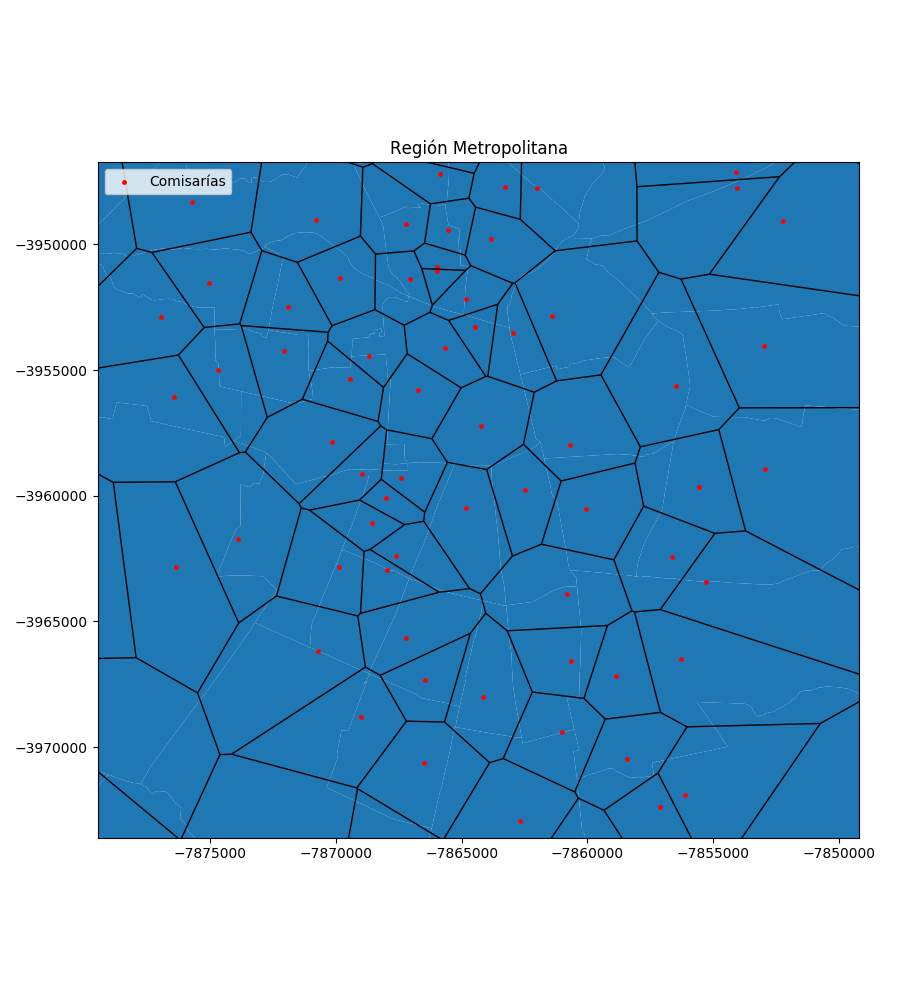

In [20]:
ms = 6  #markersize


fig = plt.figure(figsize=(9,10))
ax = fig.add_subplot(111)

ax.set_title('Región Metropolitana')

RM.plot(ax=ax)

carabineros_prueba.plot(ax=ax, color='red', markersize=ms)
voronoi_plot_2d(vor, ax=ax, show_vertices=False,show_points=False)
plt.legend(['Comisarías'])
fig.tight_layout()